c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Root Mean Squared Error (RMSE): 322293.6746467435


c:\Users\risha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


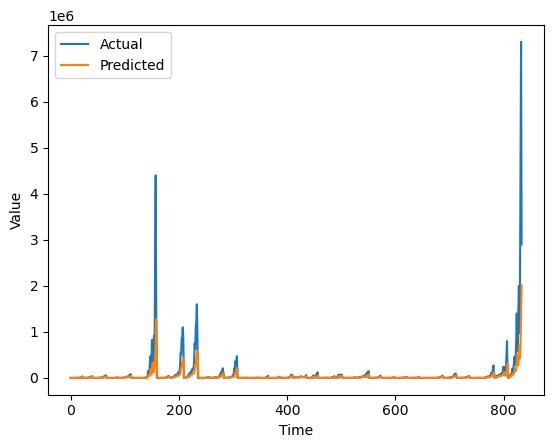

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('IEA-EV-dataEV_salesCarsHistorical.csv')
data = df.drop(['category', 'parameter', 'mode', 'unit'], axis=1)

# Convert the 'value' column to a more usable log.
data['log_value'] = data['value'].apply(lambda x: np.log(x))
df = data

encoded_data = pd.get_dummies(data, columns=['region', 'powertrain'])
x = encoded_data.drop(['log_value', 'value'], axis=1)
y = encoded_data[['log_value']]

# Fit the ARIMA model
model = ARIMA(y, order=(2, 0, 1))
model_fit = model.fit()

# Make predictions on training data
train_prediction = model_fit.predict(start=0, end=len(y)-1)

# Convert back to usable values from log_values using exp
train_prediction = np.exp(train_prediction).astype(int)

# Calculate RMSE
error_score = np.sqrt(mean_squared_error(data['value'], train_prediction))
print("Root Mean Squared Error (RMSE):", error_score)

# Plot actual vs predicted values
plt.plot(data.index, data['value'], label='Actual')
plt.plot(data.index, train_prediction, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [8]:
train_prediction

0         4137
1          113
2          270
3          156
4          181
        ...   
829     700325
830     421179
831     687731
832    1357889
833    2010185
Name: predicted_mean, Length: 834, dtype: int32

In [9]:
# R squared Error
# Checking error of the hybrid model with previous values
from sklearn import metrics
error_score = metrics.r2_score(data['value'], train_prediction)
print("R squared Error:", error_score)

R squared Error: 0.3729072143183273


In [10]:
# Calculate RMSE
error_score = np.sqrt(mean_squared_error(data['value'], train_prediction))
print("Root Mean Squared Error (RMSE):", error_score)


Root Mean Squared Error (RMSE): 322293.6746467435


In [13]:
future_data=pd.DataFrame({'year': [2023,2024,2025],
             'region': ['India','India','India'],
             'powertrain': ['BEV','BEV','BEV']})
future_data
# Perform one-hot encoding on the future data using the original encoder
encoded_future_data = pd.get_dummies(future_data, columns=['region', 'powertrain'])

encoded_future_data = encoded_future_data.reindex(columns=encoded_data.columns[:], fill_value=0)
encoded_future_data
# Remove the 'value' column from the encoded future data
encoded_future_data = encoded_future_data.drop(['value','log_value'], axis=1)
# Predict the values for future years
future_prediction = model_fit.predict(start=0, end=len(y)-1)
future_prediction
# Create DataFrame of predicted values
future_prediction = pd.DataFrame(future_prediction, columns=['log_values'])
# Converting back to usable values from log_values using exp
future_prediction['value'] = future_prediction['log_values'].apply(lambda x: np.exp(x))
future_prediction

,log_values,value
